In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
print(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset"))


print(len(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\segmented")))
print(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\segmented")[:5])

print(len(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color")))
print(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color")[:5])

print(len(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\grayscale")))
print(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [ ]:
print(len(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color\Grape___healthy")))
print(os.listdir(r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color\Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [ ]:
# Dataset Path
base_dir = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color"

(256, 256, 3)


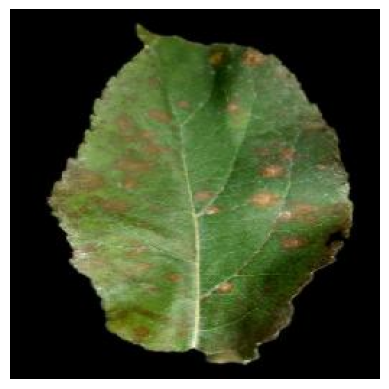

In [ ]:
image_path = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\segmented\Apple___Cedar_apple_rust\fb11d069-d664-4666-ab51-3a7a4284e495___FREC_C.Rust 3791_final_masked.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\segmented\Apple___Cedar_apple_rust\fb11d069-d664-4666-ab51-3a7a4284e495___FREC_C.Rust 3791_final_masked.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)
     

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  
    epochs=5,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2048s 1s/step - accuracy: 0.6076 - loss: 1.8575 - val_accuracy: 0.8256 - val_loss: 0.5358
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 121us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.3481
Epoch 3/5


c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1984s 1s/step - accuracy: 0.9202 - loss: 0.2523 - val_accuracy: 0.8568 - val_loss: 0.4750
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 114us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.6345e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1958s 1s/step - accuracy: 0.9689 - loss: 0.0981 - val_accuracy: 0.8645 - val_loss: 0.4939


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.8674 - loss: 0.4759
Validation Accuracy: 86.45%


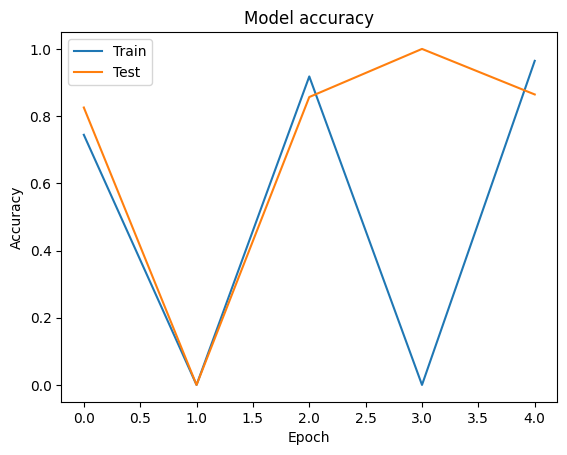

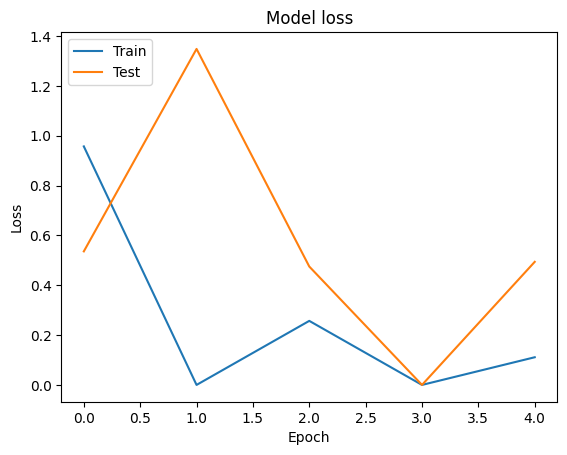

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name
     

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
import json

# Example disease information dictionary
disease_info = {
    'Apple___Apple_scab': 'Apple scab is a common fungal disease that affects apple trees, causing dark, scabby lesions on the leaves, fruit, and stems. It can lead to significant crop loss if not controlled. Management includes pruning, using resistant varieties, and applying fungicides.',
    'Apple___Black_rot': 'Black rot is a fungal disease of apple trees that results in fruit rot, leaf spots, and cankers on branches. It is especially damaging in humid conditions. Control involves removing infected material and applying fungicides.',
    'Apple___Cedar_apple_rust': 'Cedar apple rust is a fungal disease affecting apples and junipers, characterized by yellow-orange spots on apple leaves and galls on junipers. Management includes removing nearby junipers and using resistant apple varieties.',
    'Apple___healthy': 'This apple tree is healthy with no visible signs of disease or pest infestation. Regular monitoring and proper care are essential to maintain tree health.',
    'Blueberry___healthy': 'This blueberry plant is healthy with no visible signs of disease or nutrient deficiencies. Proper care, including correct watering and fertilization, will keep the plant thriving.',
    'Cherry_(including_sour)___Powdery_mildew': 'Powdery mildew is a fungal disease that affects cherry trees, causing a white, powdery coating on leaves, buds, and fruits. It thrives in warm, dry conditions and can be controlled by improving air circulation and applying fungicides.',
    'Cherry_(including_sour)___healthy': 'This cherry tree is healthy and free of disease. Proper pruning, watering, and pest control are key to maintaining tree health.',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Gray leaf spot, caused by the fungus Cercospora zeae-maydis, is a serious disease of maize. It causes gray or tan lesions on leaves, reducing photosynthesis and yield. Crop rotation and resistant hybrids are effective management strategies.',
    'Corn_(maize)___Common_rust_': 'Common rust in corn is caused by the fungus Puccinia sorghi, leading to reddish-brown pustules on leaves. It can reduce yield, especially in susceptible hybrids. Fungicides and resistant hybrids help manage the disease.',
    'Corn_(maize)___Northern_Leaf_Blight': 'Northern leaf blight is a fungal disease of maize that produces long, gray-green lesions on leaves. It can lead to significant yield losses. Management includes using resistant hybrids and applying fungicides.',
    'Corn_(maize)___healthy': 'This maize plant is healthy, showing no signs of disease or nutrient deficiencies. Good agricultural practices, including proper fertilization and pest management, help maintain plant health.',
    'Grape___Black_rot': 'Black rot is a fungal disease of grapes that causes black lesions on leaves, shoots, and fruit. It can severely reduce yield if not controlled. Management includes removing infected plant material and applying fungicides.',
    'Grape___Esca_(Black_Measles)': 'Esca, also known as black measles, is a complex disease affecting grapevines. It causes dark streaks on the wood and black spots on the fruit. The disease is difficult to control, but good vineyard hygiene and pruning practices can help.',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Leaf blight caused by Isariopsis spp. results in dark, angular spots on grape leaves, leading to premature leaf drop. It can reduce the vigor of the vine and fruit quality. Control measures include removing affected leaves and applying fungicides.',
    'Grape___healthy': 'This grapevine is healthy and free from diseases. Regular pruning, pest control, and proper irrigation are essential to maintain vine health.',
    'Orange___Haunglongbing_(Citrus_greening)': 'Huanglongbing (HLB), also known as citrus greening, is a bacterial disease that affects citrus trees. It causes yellowing of the leaves, green misshapen fruit, and eventual tree decline. There is no cure, and management involves controlling the psyllid vector and removing infected trees.',
    'Peach___Bacterial_spot': 'Bacterial spot is a disease of peach trees caused by Xanthomonas spp. It leads to dark spots on leaves, fruit, and twigs, causing defoliation and reduced fruit quality. Copper-based sprays and resistant varieties are used for management.',
    'Peach___healthy': 'This peach tree is healthy, with no signs of disease or pests. Regular care, including proper fertilization, watering, and pruning, is important to maintain tree health.',
    'Pepper,_bell___Bacterial_spot': 'Bacterial spot in bell peppers is caused by Xanthomonas campestris, leading to dark, water-soaked spots on leaves and fruit. It can severely reduce yield and fruit quality. Management includes using resistant varieties and applying bactericides.',
    'Pepper,_bell___healthy': 'This bell pepper plant is healthy and free from disease. Proper care, including watering, fertilization, and pest management, will help maintain plant health.',
    'Potato___Early_blight': 'Early blight is a fungal disease of potatoes caused by Alternaria solani. It causes dark, concentric spots on leaves and can lead to significant yield loss. Crop rotation, resistant varieties, and fungicides are key management strategies.',
    'Potato___Late_blight': 'Late blight, caused by Phytophthora infestans, is a devastating disease of potatoes. It leads to water-soaked lesions on leaves and tubers, often resulting in total crop loss. Immediate removal of infected plants and fungicide applications are essential for control.',
    'Potato___healthy': 'This potato plant is healthy and shows no signs of disease. Good agricultural practices, including crop rotation and proper fertilization, are essential to maintain plant health.',
    'Raspberry___healthy': 'This raspberry plant is healthy and free from disease. Regular pruning, pest control, and proper irrigation are important for maintaining plant health.',
    'Soybean___healthy': 'This soybean plant is healthy with no visible signs of disease. Good agricultural practices, including crop rotation and proper fertilization, are essential for maintaining plant health.',
    'Squash___Powdery_mildew': 'Powdery mildew is a common fungal disease of squash, causing a white, powdery growth on leaves. It can reduce plant vigor and yield. Management includes improving air circulation, removing infected leaves, and applying fungicides.',
    'Strawberry___Leaf_scorch': 'Leaf scorch in strawberries is caused by the fungus Diplocarpon earliana. It results in dark, angular spots on leaves, leading to leaf drop and reduced plant vigor. Removing infected leaves and applying fungicides can help manage the disease.',
    'Strawberry___healthy': 'This strawberry plant is healthy, showing no signs of disease or pests. Proper care, including regular watering and fertilization, is key to maintaining plant health.',
    'Tomato___Bacterial_spot': 'Bacterial spot is a serious disease of tomatoes caused by Xanthomonas spp. It leads to dark, water-soaked spots on leaves, stems, and fruit. The disease can reduce yield and fruit quality. Management includes using resistant varieties and applying bactericides.',
    'Tomato___Early_blight': 'Early blight is a common fungal disease of tomatoes caused by Alternaria solani. It causes dark, concentric spots on leaves and stems, reducing plant vigor and yield. Crop rotation, resistant varieties, and fungicides are effective control measures.',
    'Tomato___Late_blight': 'Late blight, caused by Phytophthora infestans, is a destructive disease of tomatoes. It leads to water-soaked lesions on leaves and fruit, often causing total crop loss. Immediate removal of infected plants and fungicide applications are essential for control.',
    'Tomato___Leaf_Mold': 'Leaf mold is a fungal disease of tomatoes caused by Cladosporium fulvum. It results in yellowing of leaves and a fuzzy, grayish-brown growth on the underside of leaves. Improved air circulation and fungicides can help manage the disease.',
    'Tomato___Septoria_leaf_spot': 'Septoria leaf spot is a fungal disease of tomatoes caused by Septoria lycopersici. It leads to small, circular spots on leaves, causing defoliation and reducing yield. Control includes removing infected leaves and applying fungicides.',
    'Tomato___Spider_mites Two-spotted_spider_mite': 'Spider mites are tiny pests that feed on tomato plants, causing yellowing and stippling of leaves. Severe infestations can reduce plant vigor and yield. Management includes using miticides and promoting natural predators.',
    'Tomato___Target_Spot': 'Target spot is a fungal disease of tomatoes caused by Corynespora cassiicola. It leads to circular, target-like spots on leaves and fruit, reducing yield and fruit quality. Management includes removing infected material and applying fungicides.',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Tomato yellow leaf curl virus (TYLCV) is a viral disease transmitted by whiteflies. It causes yellowing and curling of leaves, stunting of plants, and reduced fruit production. Control involves managing whitefly populations and using resistant varieties.',
    'Tomato___Tomato_mosaic_virus': 'Tomato mosaic virus (TMV) is a viral disease that causes mottled leaves, stunted growth, and reduced fruit quality. It is managed by using resistant varieties and practicing good sanitation to prevent the spread of the virus.',
    'Tomato___healthy': 'This tomato plant is healthy, with no visible signs of disease or pest infestation. Regular care, including proper watering, fertilization, and pest management, is essential for maintaining plant health.'
}

# Convert the dictionary to a JSON file
with open('disease_info.json', 'w') as file:
    json.dump(disease_info, file, indent=4)

print("Disease information has been successfully written to disease_info.json")

Disease information has been successfully written to disease_info.json


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Predicted Class Name: Corn_(maize)___Common_rust_
Disease Information: Common rust in corn is caused by the fungus Puccinia sorghi, leading to reddish-brown pustules on leaves. It can reduce yield, especially in susceptible hybrids. Fungicides and resistant hybrids help manage the disease.


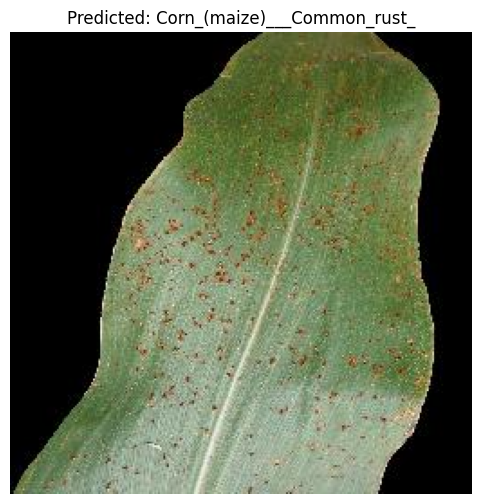

In [ ]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the disease information from the JSON file
with open('disease_info.json', 'r') as file:
    disease_info = json.load(file)

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Example Usage
image_path = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color\Corn_(maize)___Common_rust_\RS_Rust 2739.JPG"
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

# Get the corresponding disease information
disease_info_text = disease_info.get(predicted_class_name, "No information available for this class.")
print("Disease Information:", disease_info_text)

# Display the image
img = Image.open(image_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title(f'Predicted: {predicted_class_name}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Class Name: Tomato___Early_blight
Disease Information: Early blight is a common fungal disease of tomatoes caused by Alternaria solani. It causes dark, concentric spots on leaves and stems, reducing plant vigor and yield. Crop rotation, resistant varieties, and fungicides are effective control measures.


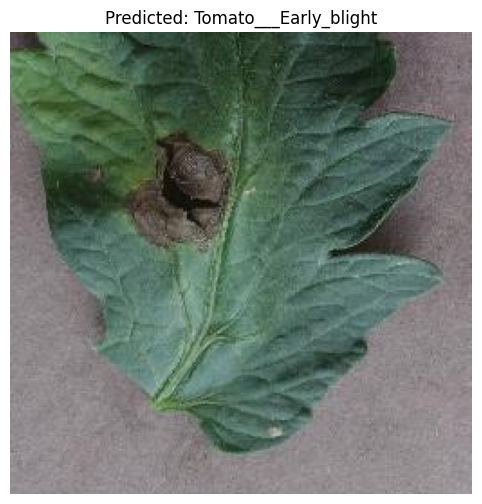

In [ ]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the disease information from the JSON file
with open('disease_info.json', 'r') as file:
    disease_info = json.load(file)

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

# Example Usage
image_path = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color\Tomato___Early_blight\fee744d4-d0e5-439d-8b7b-04f8394251e8___RS_Erly.B 7396.JPG"
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

# Get the corresponding disease information
disease_info_text = disease_info.get(predicted_class_name, "No information available for this class.")
print("Disease Information:", disease_info_text)

# Display the image
img = Image.open(image_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.title(f'Predicted: {predicted_class_name}')
plt.show()

In [ ]:
model.save('plant_disease_prediction_model.h5')

In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('plant_disease_prediction_model.h5')


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformers import ViTForImageClassification, ViTFeatureExtractor
from sklearn.model_selection import train_test_split
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

# Paths to dataset
data_dir = r"C:\Users\ayush\Downloads\Plant Disease Detection\plantvillage dataset\color"  # Replace with your dataset path

# Load and preprocess data
img_size = 224  # Vision Transformers require square images
batch_size = 32
num_classes = 38  # Replace with the number of classes in your dataset

# Image data generator for loading images
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Define Vision Transformer model using HuggingFace
vit_model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",  # Pretrained ViT model
    num_labels=num_classes
)

# Convert HuggingFace model to Keras layer
vit_layer = tf.keras.layers.Lambda(lambda x: vit_model(x)[0])

# Build Keras model
input_layer = tf.keras.layers.Input(shape=(img_size, img_size, 3))
flattened_layer = tf.keras.layers.Flatten()(input_layer)
vit_output = vit_layer(flattened_layer)
output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(vit_output)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


AttributeError: partially initialized module 'torch' has no attribute 'version' (most likely due to a circular import)

In [7]:
mv torch.py my_script.py  # Rename the conflicting file


SyntaxError: invalid syntax (1588292232.py, line 1)